# Gaussian Mixture Models

Gaussian Mixture Models trained with the EM algorithm can be seen as an extension of K-Means where clusters are *soft*. This means that data is not separated into different independant clusters. Instead for each point and cluster pair a probability of the point belonging to the cluster is computed. Each cluster is modeled as a multivariate gaussian. Moreover each cluster $S_j$ is defined by 3 parameters: its vector mean $\bf{\mu}_j$ and covariance matrix $\Sigma_j$, and a weight $\phi_j$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")
from models.gmm import GMM
from utils.datasets import blobs_classification_dataset
from utils.visualization import plot_decision_boundary
from utils.metrics import prediction_strength

In [2]:
%matplotlib inline

np.random.seed(1)

### Fitting 4 true clusters with different values of k

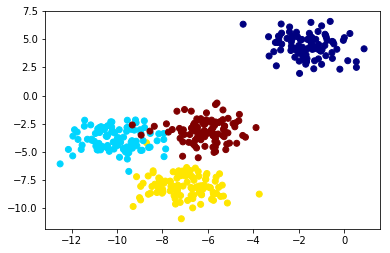

In [3]:
(x_train, y_train), (_, _) = blobs_classification_dataset(features=2, classes=4, samples=500)

# Visualize
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='jet')
plt.show()

### Initial guess of 3 clusters

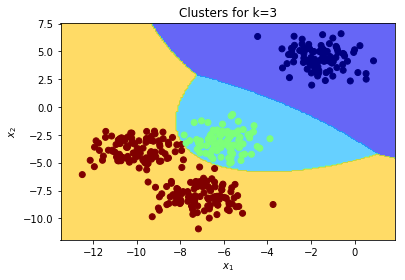

In [4]:
# Initialize and fit the model
model3 = GMM(k=3, max_iter=100)
model3.fit(x_train)

# Visualize decision boundary
y_hat = model3.predict(x_train)

ax = plot_decision_boundary(model3.predict,
                            x_range=[x_train[:, 0].min()-1, x_train[:, 0].max()+1],
                            y_range=[x_train[:, 1].min()-1, x_train[:, 1].max()+1], classes=3)
ax.scatter(x_train[:, 0], x_train[:, 1], c=np.argmax(y_hat, axis=1), cmap='jet', label='True classes')
plt.title("Clusters for k={}".format(3))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [5]:
# Prediction strength for k = 3
ps = prediction_strength(model3, x_train)

print('k=3, prediction strength: {}'.format(ps))

k=3, prediction strength: 0.5226480836236934


### Find better number of clusters using cross-validation with prediction strength metric

In [6]:
def cross_validatePS(model, X, f=5):
    X_fold = X
    pivot = int(X_fold.shape[0]/f)
    cum_score = 0
    for _ in range(f):
        # Always take firt fold as test
        x_test = X_fold[:pivot, :]
        x_train = X_fold[pivot:, :]
        
        # Asses the model
        score = prediction_strength(model, x_train, x_test)
        cum_score += score
        
        X_fold = np.concatenate((x_train, x_test))
        
    return cum_score/f

../models/gmm.py:94: RuntimeWarning: invalid value encountered in sqrt
  factor = 1./np.sqrt(np.linalg.det(variance)*(2*np.pi)**self.k)
/opt/conda/lib/python3.6/site-packages/numpy/linalg/linalg.py:2022: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
../models/gmm.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  factor = 1./np.sqrt(np.linalg.det(variance)*(2*np.pi)**self.k)
../models/gmm.py:76: RuntimeWarning: invalid value encountered in true_divide
  h = h/np.sum(h, axis=1, keepdims=True)
../models/gmm.py:88: RuntimeWarning: invalid value encountered in true_divide
  self.means[k] = np.sum(h[:, k, 

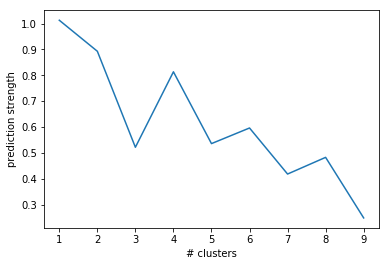

In [7]:
K = np.arange(1, 10)
scores = []
best_score = float('inf')
for k in K:
    model = GMM(k=k)
    scores.append(cross_validatePS(model, x_train))
    if scores[-1]>=0.8:
        best_score = scores[-1]
        best_model = model
        best_k = k
    
    
# Display results
plt.plot(K, scores)
plt.xlabel('# clusters')
plt.ylabel('prediction strength')
plt.show()

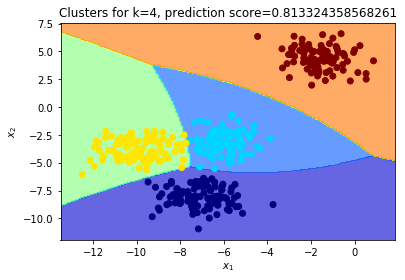

In [8]:
# Visualize decision boundary
best_model.fit(x_train)
y_hat= best_model.predict(x_train)

ax = plot_decision_boundary(best_model.predict,
                            x_range=[x_train[:, 0].min()-1, x_train[:, 0].max()+1],
                            y_range=[x_train[:, 1].min()-1, x_train[:, 1].max()+1], classes=best_k)
ax.scatter(x_train[:, 0], x_train[:, 1], c=np.argmax(y_hat, axis=1), cmap='jet', label='True classes')
plt.title("Clusters for k={}, prediction score={}".format(best_k, best_score))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Comparing the results with those obtained in the vanilla-kmeans notebook we can see that this model has more capability of representing the true data distribution, having high prediction scores for the true number of clusters. This is porbably beacuse the underlying distribution of the data is just a bunch of bidimensional gaussians.